Generated L-system string:
1111111111111111[11111111[1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0]1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0]11111111[1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0]1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0


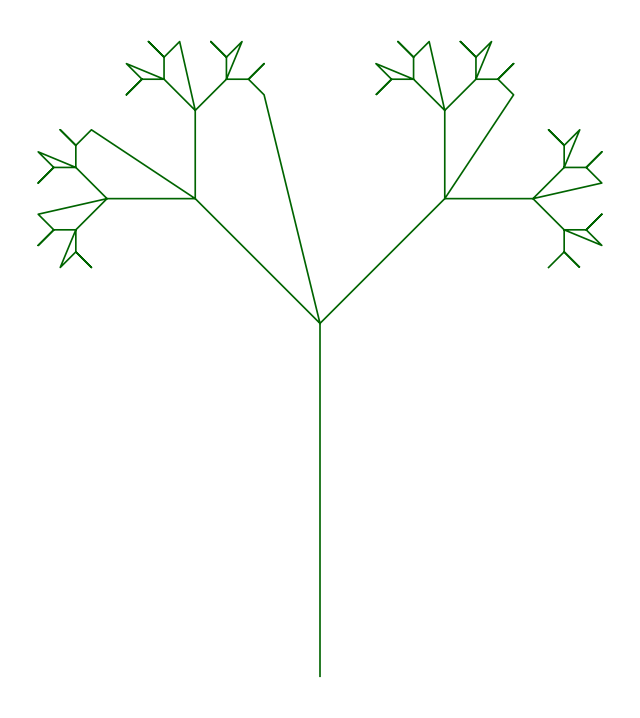

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def generate_l_system_string(axiom, rules, iterations):
    """
    Generates the L-system string based on the given axiom, rules, and number of iterations.
    """
    current_string = axiom
    for _ in range(iterations):
        next_string = []
        for char in current_string:
            next_string.append(rules.get(char, char))
        current_string = "".join(next_string)
    return current_string


def draw_lsystem_matplotlib(lstring, segment_length, angle_deg):
    """
    Draws the L-system string using Matplotlib instead of turtle graphics.
    """
    angle = np.radians(angle_deg)

    # Lists storing the polyline
    xs, ys = [0], [0]

    # Current state
    x, y, theta = 0.0, -300.0, np.pi/2  # start facing upward
    stack = []

    # Move starting coordinate to bottom center
    xs[-1], ys[-1] = x, y

    for char in lstring:
        if char in ("0", "1"):
            # Move forward
            x_new = x + segment_length * np.cos(theta)
            y_new = y + segment_length * np.sin(theta)

            xs.append(x_new)
            ys.append(y_new)

            x, y = x_new, y_new

        elif char == "[":
            # Push state, turn left
            stack.append((x, y, theta))
            theta += angle  

        elif char == "]":
            # Pop state, turn right
            x, y, theta = stack.pop()
            xs.append(x)
            ys.append(y)
            theta -= angle  

    # ---- Plot ----
    fig = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111)

    ax.plot(xs, ys, linewidth=1.2, color="darkgreen")
    ax.set_aspect("equal", "box")
    ax.axis("off")

    plt.show()


# ------------------------
# L-system parameters
# ------------------------
axiom = "0"
rules = {
    "1": "11",
    "0": "1[0]0"
}

iterations = 5
segment_length = 15
angle_deg = 45

# Generate L-system string
lstring = generate_l_system_string(axiom, rules, iterations)
print("Generated L-system string:")
print(lstring)

# Draw fractal tree
draw_lsystem_matplotlib(lstring, segment_length, angle_deg)


Generated L-system string:
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111[1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111[11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111[1111111111111111111111111111111111111111111111111111111111111111[111111111

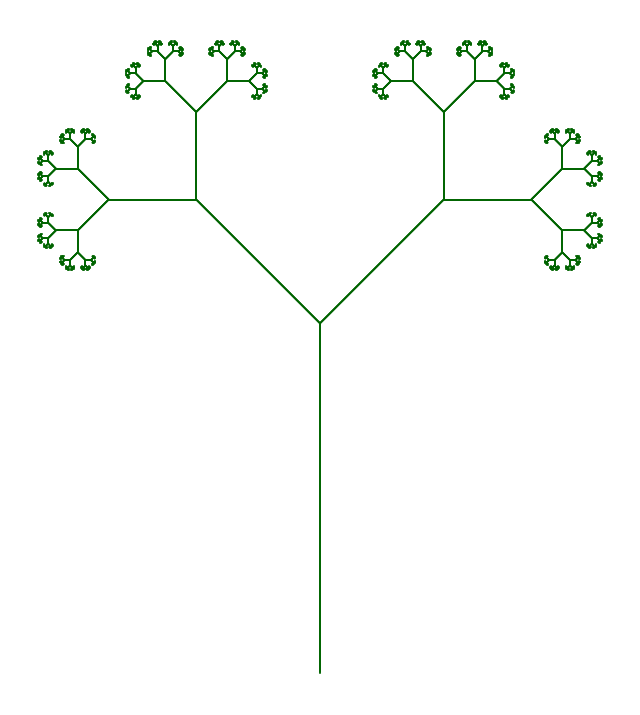

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_l_system_string(axiom, rules, iterations):
    current_string = axiom
    for _ in range(iterations):
        next_string = []
        for char in current_string:
            next_string.append(rules.get(char, char))
        current_string = "".join(next_string)
    return current_string


def draw_lsystem_matplotlib(lstring, segment_length, angle_deg):
    angle = np.radians(angle_deg)

    # Store line segments: each is ((x0,y0),(x1,y1))
    segments = []

    # Current drawing state
    x, y, theta = 0.0, -300.0, np.pi/2  # initial upward
    stack = []

    for char in lstring:
        if char in ("0", "1"):
            # Compute new point
            x_new = x + segment_length * np.cos(theta)
            y_new = y + segment_length * np.sin(theta)

            # Store a NEW segment (no polyline continuity)
            segments.append(((x, y), (x_new, y_new)))

            # Update pointer
            x, y = x_new, y_new

        elif char == "[":
            # Save current state
            stack.append((x, y, theta))
            theta += angle

        elif char == "]":
            # Restore previous state
            x, y, theta = stack.pop()
            theta -= angle

    # ---- Plot ----
    fig = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111)

    for (x0, y0), (x1, y1) in segments:
        ax.plot([x0, x1], [y0, y1], color="darkgreen", linewidth=1.2)

    ax.set_aspect("equal", "box")
    ax.axis("off")
    plt.show()


# ------------------------
# L-system parameters
# ------------------------
axiom = "0"
rules = {
    "1": "11",
    "0": "1[0]0"
}

iterations = 10
segment_length = 15
angle_deg = 45

# Generate L-system string
lstring = generate_l_system_string(axiom, rules, iterations)
print("Generated L-system string:")
print(lstring)

# Draw fractal tree
draw_lsystem_matplotlib(lstring, segment_length, angle_deg)

Side lengths:
   1.1788834270037571
   1.184276930263975
   1.207209213050514
   1.1763781957843997
   1.1685427299594338

Apothem:
   1.020942995885712
   1.0256139067244547
   1.0454738461843662
   1.0187734020073944
   1.011987689552489

Midpoints:
   (np.float64(0.6608870253298113), np.float64(0.47039270411821843))
   (np.float64(-0.26178500533564575), np.float64(0.7716352979805203))
   (np.float64(-0.8307877704259605), np.float64(-0.001117459236611107))
   (np.float64(-0.26613835869787517), np.float64(-0.7640881465310618))
   (np.float64(0.6580717226577171), np.float64(-0.4617280934321488))

Normals (outward):
   (0.7980309050806925, 0.6026165236168773)
   (-0.28565972355505237, 0.9583311131015476)
   (-0.9999967535634734, 0.0025481095960967984)
   (-0.2709469470011224, -0.9625942820891733)
   (0.7902630885362281, -0.6127676973349541)

Lengths (apothem*cos alpha):
   0.8841625702528182
   0.8882076976979816
   0.905406909787886
   0.8822836468383001
   0.8764070474695755

Centers 

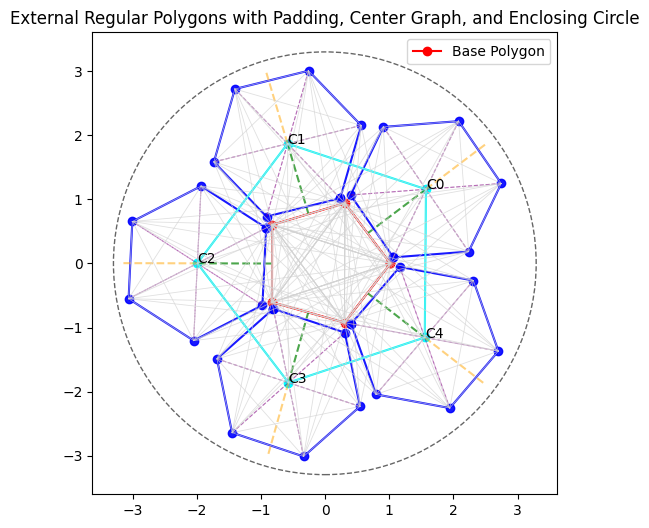

In [10]:
# Van_Aubel.py
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Basic helpers
# ---------------------------------------------------

def print_list(name, arr):
    """Pretty-print a list or numpy array."""
    print(f"{name}:")
    if isinstance(arr, np.ndarray):
        for val in arr:
            print("  ", val)
    else:
        for val in arr:
            print("  ", val)
    print()


def perturbed_polygon(n=5, radius=1.0, noise_level=0.02, lambd=0.01, seed=None):
    """
    Generate a near-regular n-gon with small radial noise.
    - noise_level: amplitude of random perturbation on radius
    - lambd: optional tiny bias (kept for compatibility with your call signature)
    """
    if seed is not None:
        rng = np.random.default_rng(seed)
    else:
        rng = np.random.default_rng()

    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    base_r = radius * np.ones_like(angles)
    noise = noise_level * rng.standard_normal(size=n) + lambd
    r = base_r * (1.0 + noise)

    pts = [(float(r_i * np.cos(a)), float(r_i * np.sin(a)))
           for r_i, a in zip(r, angles)]
    return pts


def all_connected(points, plot_label=False, color="lightgray", linewidth=0.6, alpha=0.7):
    """
    Draw the complete graph on 'points'.
    points: list of (x, y) tuples
    """
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    # Draw all pairwise connections
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            x1, y1 = points[i]
            x2, y2 = points[j]
            plt.plot([x1, x2], [y1, y2], '-', color=color, linewidth=linewidth, alpha=alpha)

    if plot_label:
        for idx, (x, y) in enumerate(points):
            plt.text(x, y, f"P{idx}", fontsize=8, color="black")


# ---------------------------------------------------
# Geometry helpers from your snippet
# ---------------------------------------------------

def polygon_signed_area(pts):
    """>0 if CCW, <0 if CW."""
    x = np.array([p[0] for p in pts] + [pts[0][0]])
    y = np.array([p[1] for p in pts] + [pts[0][1]])
    return 0.5 * np.sum(x[:-1]*y[1:] - x[1:]*y[:-1])


def centroid(pts):
    xs = np.array([p[0] for p in pts], dtype=float)
    ys = np.array([p[1] for p in pts], dtype=float)
    return (float(xs.mean()), float(ys.mean()))


def draw_external_circle(all_pts, margin=0.05):
    """
    Draw a circle enclosing all points, with a small margin,
    and return (cx, cy, r).
    """
    cx, cy = centroid(all_pts)
    r = max(np.hypot(np.array([p[0]-cx for p in all_pts]),
                     np.array([p[1]-cy for p in all_pts]))) * (1.0 + margin)
    circ = plt.Circle(
        (cx, cy),
        r,
        fill=False,
        linestyle='--',
        linewidth=1.0,
        alpha=0.6,
        color='black'
    )
    ax = plt.gca()
    ax.add_patch(circ)
    return cx, cy, r


def plot_polygon_with_external(
    A, n=5,
    padding=0.10,               # gap between base edge and each external polygon edge
    show_outer_circle=True,
    outer_circle_margin=0.05,   # how much larger than the furthest point
    return_geometry=False       # <-- for integration with Apollonian code
):
    """
    Plot base polygon, attach external n-gons with a gap, connect all center points,
    mark intersections, and draw an enclosing outer circle.

    If return_geometry=True, returns a dict with:
      {
        "base_polygon": A,
        "external_polygons": external_pts,
        "external_centers": centers,
        "external_circumradii": list(R_match),
        "outer_center": (cx, cy) or None,
        "outer_radius": r or None,
      }
    and does NOT call plt.show().
    """
    # Connect all base vertices (light graph)
    all_connected(A, plot_label=False)

    # Base polygon ring
    verts = A + [A[0]]
    xs = np.array([p[0] for p in verts], dtype=float)
    ys = np.array([p[1] for p in verts], dtype=float)

    # Geometry on edges
    edges = np.stack((np.diff(xs), np.diff(ys)), axis=1)
    lengths = np.linalg.norm(edges, axis=1)
    print_list('Side lengths', lengths)

    alpha = np.pi / n  # half central angle for the external regular n-gon
    # Circumradius of the external n-gon so that one of its sides *would* match the base edge
    R_match = lengths / (2 * np.sin(alpha))
    apothems = R_match * np.cos(alpha)  # distance from center to that matching side
    print_list('Apothem', apothems)

    # Midpoints and raw normals (right-hand normal of each directed edge)
    mids = [((xs[i]+xs[i+1])/2, (ys[i]+ys[i+1])/2) for i in range(len(edges))]
    print_list('Midpoints', mids)
    raw_normals = []
    for dx, dy in edges:
        nvec = np.array([dy, -dx], dtype=float)
        nvec /= np.linalg.norm(nvec)
        raw_normals.append((float(nvec[0]), float(nvec[1])))

    # Ensure normals point outward
    base_centroid = centroid(A)
    normals = []
    for M, (nx, ny) in zip(mids, raw_normals):
        vx, vy = M[0] - base_centroid[0], M[1] - base_centroid[1]
        # If normal points inward (dot < 0), flip it
        if vx*nx + vy*ny < 0:
            nx, ny = -nx, -ny
        normals.append((nx, ny))
    print_list('Normals (outward)', normals)
    print_list('Lengths (apothem*cos alpha)', apothems * np.cos(alpha))

    # With padding: move each external polygon center farther by +padding along the outward normal
    centers = []
    for M, (nx, ny), a in zip(mids, normals, apothems):
        d = a + padding  # original center at distance a; add padding to create gap
        centers.append((float(M[0] + nx * d), float(M[1] + ny * d)))
    print_list('Centers (padded)', centers)

    # Plot base polygon
    plt.plot(xs, ys, '-o', color='red', label='Base Polygon')

    # Plot the (padded) apothem rays for reference
    for M, (nx, ny), a in zip(mids, normals, apothems):
        d = a + padding
        plt.plot([M[0], M[0] + nx * d], [M[1], M[1] + ny * d],
                 '--', color='green', alpha=0.7)

    # Build and plot each external regular n-gon using the new centers.
    external_pts = []
    for i, (C, R, (nx, ny)) in enumerate(zip(centers, R_match, normals)):
        # We want the side that’s parallel to the base edge to face the base edge,
        # so we reuse the original orientation logic with the vertex touching P1 when padding=0.
        P1 = np.array(A[i])
        P2 = np.array(A[(i+1) % len(A)])

        # Angle from center to P1 (this uses the *padded* center now)
        phi1 = np.arctan2(P1[1] - C[1], P1[0] - C[0])

        # Decide rotation direction to keep polygon consistent with the edge P1->P2
        cand = np.array(C) + R * np.array([
            np.cos(phi1 + 2 * alpha),
            np.sin(phi1 + 2 * alpha)
        ])
        sign = 1 if np.allclose(cand, P2, atol=1e-6) else -1

        poly = []
        for k in range(n):
            ang = phi1 + sign * 2 * np.pi * k / n
            poly.append((float(C[0] + R * np.cos(ang)),
                         float(C[1] + R * np.sin(ang))))
        external_pts.append(poly)

        # Plot the external polygon
        px, py = zip(*(poly + [poly[0]]))
        plt.plot(px, py, '-o', color='blue', alpha=0.9)

        # Diameters for even n (decorative)
        if n % 2 == 0:
            for m in range(n):
                a_pt, b_pt = poly[m], poly[(m + n // 2) % n]
                plt.plot([a_pt[0], b_pt[0]], [a_pt[1], b_pt[1]],
                         '--', color='purple', linewidth=0.8, alpha=0.35)

    # Print split lists (kept for your downstream processing)
    repetitive_external_pts = [poly[:2] for poly in external_pts]
    assorted_external_pts = [poly[2:] for poly in external_pts]
    formatted_ext = ["[" + ", ".join(f"({x:.4f}, {y:.4f})" for x, y in poly) + "]"
                     for poly in assorted_external_pts]
    print("External points:\n [" + ",\n ".join(formatted_ext) + "]")
    formatted_ext = ["[" + ", ".join(f"({x:.4f}, {y:.4f})" for x, y in poly) + "]"
                     for poly in repetitive_external_pts]
    print("Repetitive external points:\n [" + ", \n".join(formatted_ext) + "]")

    # Connect the (padded) centers and find intersections
    for idx, (cx, cy) in enumerate(centers):
        plt.scatter(cx, cy, color='cyan')
        plt.text(cx, cy, f'C{idx}', fontsize=10)

    # Center polygon & orange guides
    n_centers = len(centers)
    for i in range(n_centers):
        xC, yC = zip(*[centers[i], centers[(i+1) % n_centers]])
        plt.plot(xC, yC, '-', color='cyan')

    if n_centers % 2 == 0:
        for i in range(n_centers):
            j = (i + n_centers // 2) % n_centers
            a, b = centers[i], centers[j]
            plt.plot([a[0], b[0]], [a[1], b[1]],
                     '--', color='orange', linewidth=0.8, alpha=0.4)
    else:
        # project along outward normals for odd count
        for (C, R, (nx, ny)) in zip(centers, R_match, normals):
            end_x = C[0] + nx * R
            end_y = C[1] + ny * R
            plt.plot([C[0], end_x], [C[1], end_y],
                     '--', color='orange', alpha=0.5)

    # Intersections among centers
    all_connected(centers, plot_label=False)

    # Your “non_repetitive/new_centers” graph logic — unchanged, but uses updated external_pts
    polygon_points = A.copy()
    non_repetitive = []
    for i in range(len(A)):
        pts = []
        for p in polygon_points:
            contains = False
            for p1 in repetitive_external_pts[i]:
                if np.hypot(p1[0]-p[0], p1[1]-p[1]) < 1e-9:
                    contains = True
                    break
            if not contains:
                pts.append(p)
        non_repetitive.append(pts)
    print(non_repetitive)

    new_centers = []
    for i in range(len(A)):
        c = assorted_external_pts[i] + non_repetitive[i]
        c_d = [(float(x), float(y)) for (x, y) in c]
        new_centers.append(c_d)
    print(new_centers)

    for i in range(len(A)):
        all_connected(new_centers[i], plot_label=False)

    # ---- Outer circle (enclosing the entire figure) ----
    outer_center = None
    outer_radius = None
    if show_outer_circle:
        # Collect *all* points: base polygon, all external vertices, centers
        all_pts = list(A) + [pt for poly in external_pts for pt in poly] + centers
        cx, cy, r = draw_external_circle(all_pts, margin=outer_circle_margin)
        outer_center = (cx, cy)
        outer_radius = r

    geom = {
        "base_polygon": A,
        "external_polygons": external_pts,
        "external_centers": centers,
        "external_circumradii": list(R_match),
        "outer_center": outer_center,
        "outer_radius": outer_radius,
    }

    if return_geometry:
        return geom

    plt.axis('equal')
    plt.legend()
    plt.title('External Regular Polygons with Padding, Center Graph, and Enclosing Circle')
    plt.show()


if __name__ == '__main__':
    # Example standalone run
    A = perturbed_polygon(n=5, radius=1.0, noise_level=0.02, lambd=0.01, seed=42)
    plt.figure(figsize=(6, 6))
    plot_polygon_with_external(
        A,
        n=len(A) + 1,
        padding=0.12,
        show_outer_circle=True,
        outer_circle_margin=0.06
    )

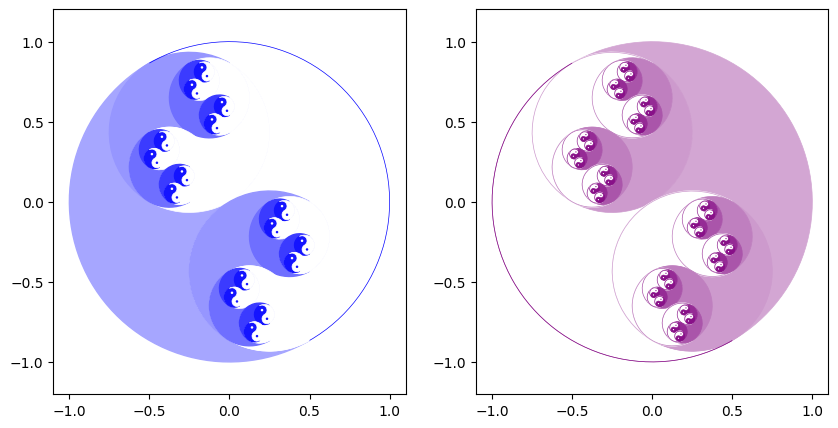

In [9]:
import numpy as np
from matplotlib.patches import Circle, Wedge, Arc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math

class Circle_Yinyang(Circle):
    default_angle = np.pi / 6
    def __init__(self, center="origin", bend=None, radius=None, **kwargs):
        # --- normalize center ---
        if isinstance(center, str):
            if center.lower() == "origin":
                cx, cy = 0.0, 0.0
            else:
                raise ValueError('center as string must be "origin"')
        else:
            cx, cy = (float(center[0]), float(center[1]))

        # --- normalize bend / radius ---
        if (bend is None) == (radius is None):  # both None or both set
            raise ValueError("Provide exactly one of bend or radius.")

        if radius is not None:
            radius = float(radius)
            if not np.isfinite(radius) or radius <= 0:
                raise ValueError("radius must be a positive finite number.")
            bend = 1.0 / radius
        else:
            bend = float(bend)
            if np.isclose(bend, 0.0):
                raise ValueError("bend == 0 → infinite radius (line).")
            radius = abs(1.0 / bend)

        self.bend = bend
        self.sign = np.sign(bend)

        # IMPORTANT: don't assign to self.angle (Circle/Ellipse uses that internally)
        self.draw_angle = self.sign * self.default_angle  # radians for yin-yang drawing
        self.draw_angle = np.atan2(cy, cx) if cx != 0 else self.sign * self.default_angle
        self.angle_deg = np.degrees(self.sign * self.default_angle)

        # Init Circle patch first so internal Artist attrs exist
        super().__init__((cx, cy), radius=radius, **kwargs)

        # Optional: clip by own path safely
        self.set_clip_path(self.get_path(), self.get_transform())

    # Keep the user-facing name but route to our own storage
    def set_angle(self, angle_rad: float):
        """Set the yin-yang drawing angle in radians (does NOT touch Circle.angle)."""
        self.draw_angle = float(angle_rad)
    
    def get_angle(self):
        return self.draw_angle
    
    def get_bend(self):
        return self.bend
        
    # --- Nice repr ---
    def __repr__(self):
        cx, cy = self.center_xy
        return (f"CircleYinyang(center=({cx:.4f},{cy:.4f}), bend={self.bend:.6g}, "
                f"radius={self.radius_value:.6g}, angle_deg={self.angle_deg:.3f})")

    # ---------------- helpers (bound to self) ----------------
    def draw_yinyang(self, ax, rev=False, lw=0.25, color="black"):
        center = self.get_center()
        radius = self.get_radius()
        angle  = self.draw_angle

        angle += np.pi/2
        colors = [color, "white"] if rev else ["white", color]

        # big halves
        ax.add_patch(Wedge(center, radius,
                           np.degrees(angle), np.degrees(angle + np.pi),
                           facecolor=colors[0], edgecolor=colors[0]))
        ax.add_patch(Wedge(center, radius,
                           np.degrees(angle + np.pi), np.degrees(angle + 2*np.pi),
                           facecolor=colors[1], edgecolor="none"))
        ax.add_patch(Arc(center, 2*radius, 2*radius,
                         theta1=np.degrees(angle + np.pi),
                         theta2=np.degrees(angle + 2*np.pi),
                         edgecolor=colors[1], linewidth=lw))

        # two mid-circles
        new_radius = radius / 2.0
        c0 = np.array([center[0] + new_radius * np.cos(angle),
                       center[1] + new_radius * np.sin(angle)])
        c1 = np.array([center[0] + new_radius * np.cos(angle + np.pi),
                       center[1] + new_radius * np.sin(angle + np.pi)])
        new_centers = [c0, c1]

        ax.add_patch(Circle(new_centers[0], new_radius, facecolor=colors[0], edgecolor="none"))
        ax.add_patch(Arc(new_centers[0], 2*new_radius, 2*new_radius,
                         theta1=np.degrees(angle + np.pi),
                         theta2=np.degrees(angle + 2*np.pi),
                         edgecolor=colors[1], linewidth=lw))
        ax.add_patch(Circle(new_centers[1], new_radius, facecolor=colors[1], edgecolor="none"))
        ax.add_patch(Arc(new_centers[1], 2*new_radius, 2*new_radius,
                         theta1=np.degrees(angle),
                         theta2=np.degrees(angle + np.pi),
                         edgecolor=colors[1], linewidth=lw))

        # inner dots
        inner_radius = radius / 8.0
        ax.add_patch(Circle(new_centers[0], inner_radius, facecolor=colors[1], edgecolor="none"))
        ax.add_patch(Circle(new_centers[1], inner_radius, facecolor=colors[0], edgecolor="none"))
        ax.axis("equal")
        return new_centers, new_radius, inner_radius

    def draw_yinyang_c(self, ax, rev=False, lw=0.25, color="black"):
        center = self.get_center()
        radius = self.get_radius()
        angle  = self.draw_angle

        new_centers, new_radius, inner_radius = self.draw_yinyang(ax, rev=rev, lw=lw, color=color)
        if rev:
            ax.add_patch(Arc(center, 2*radius, 2*radius,
                             theta1=np.degrees(angle - np.pi/2.0),
                             theta2=np.degrees(angle + np.pi/2.0),
                             edgecolor=color, linewidth=lw))
        else:
            ax.add_patch(Arc(center, 2*radius, 2*radius,
                             theta1=np.degrees(angle + np.pi/2.0),
                             theta2=np.degrees(angle + 3.0*np.pi/2.0),
                             edgecolor=color, linewidth=lw))
        return new_centers, new_radius, inner_radius

    # -------- gradient color helper --------
    # --- Gradient helper ---
    def get_color(self, depth, max_depth, base_color="blue", sigma=0.25, alpha=1.0, fraction=1/3, ascending=False):
        """
        Same-hue gradient from half-dark → dark with Gaussian smoothing.
        - depth: remaining recursion depth (root has depth=max_depth)
        - max_depth: initial recursion depth
        - sigma: smoothing width (~0.1..0.5). Smaller = steeper.
        - alpha: opacity (1.0 = opaque)
        """
        # clamp/normalize
        depth = max(0, int(depth))
        max_depth = max(1, int(max_depth))

        # colors
        rgb   = np.array(mcolors.to_rgb(base_color))
        white = np.array([1.0, 1.0, 1.0])

        # start at "half the darkness" (midpoint between white and base color)
        half_dark = (1 - fraction) * white + fraction * rgb

        # progress root→leaf: 0 at root, 1 at leaves
        x = (max_depth - depth) / max_depth

        # Gaussian CDF smoothing around 0.5
        z = (x - 0.5) / (sigma * math.sqrt(2.0))
        m = 0.5 * (1.0 + math.erf(z))  # in [0, 1]

        # mix: m=0 → half_dark, m=1 → base_color
        if ascending:
            m = 1.0 - m
        col = (1.0 - m) * half_dark + m * rgb
        return (float(col[0]), float(col[1]), float(col[2]), float(alpha))

    # --------------- graph methods (inside the class) ---------------
    # color of the circle dependent on depth
    # apply a gradient from light to dark
    # --------------- graph methods ---------------
    def draw_yinyang_graph_helper(
        self, ax, center, radius, angle, depth,
        rev=False, lw=0.5, flip_angle=True, used_circle=False,
        max_depth=None, base_color="blue"
    ):
        """Draw current taijitu and recurse; gradient color applied at every level."""
        if depth <= 0:
            return
        if max_depth is None:
            max_depth = depth

        # compute this level's color (gradient)
        level_color = self.get_color(depth, max_depth, base_color=base_color)

        # build node at requested params
        bend = float(self.sign) * (1.0 / float(radius))
        node = Circle_Yinyang(center, bend, edgecolor="none", fill=False)
        node.draw_angle = float(angle)

        # choose draw function based on used_circle; ALWAYS pass level_color
        draw_fn = node.draw_yinyang_c if used_circle else node.draw_yinyang
        new_centers, new_radius, _ = draw_fn(ax, rev=rev, lw=lw, color=level_color)

        # recurse with same max_depth/base_color to continue gradient
        if depth > 1:
            next_angle = -angle if flip_angle else angle
            self.draw_yinyang_graph_helper(
                ax, new_centers[0], new_radius, next_angle, depth-1,
                rev=rev, lw=lw, flip_angle=flip_angle, used_circle=used_circle,
                max_depth=max_depth, base_color=base_color
            )
            self.draw_yinyang_graph_helper(
                ax, new_centers[1], new_radius, next_angle, depth-1,
                rev=rev, lw=lw, flip_angle=flip_angle, used_circle=used_circle,
                max_depth=max_depth, base_color=base_color
            )

    def draw_yinyang_graph(self, ax, depth=2, rev=False, lw=0.5,
                           add_outer_arc=True, flip_angle=True, _is_root=True,
                           used_circle=True, color="black"):
        center = self.get_center()
        radius = self.get_radius()
        angle  = self.draw_angle
        max_depth = depth

        self.draw_yinyang_graph_helper(ax, center, radius, angle, depth,
                                       rev=rev, lw=lw, flip_angle=flip_angle,
                                       used_circle=used_circle, max_depth=max_depth,
                                       base_color=color)

        # root_color = self.get_color(depth, max_depth, base_color=color)
        root_color = self.get_color(0, max_depth, base_color=color)
        if add_outer_arc and _is_root:
            if not rev:
                ax.add_patch(
                    Arc(center, 2*radius, 2*radius,
                        theta1=np.degrees(angle + np.pi / 2),
                        theta2=np.degrees(angle + 3 * np.pi / 2),
                        edgecolor=root_color, linewidth=lw)
                )
            else:
                ax.add_patch(
                    Arc(center, 2*radius, 2*radius,
                        theta1=np.degrees(angle - np.pi / 2),
                        theta2=np.degrees(angle + np.pi / 2),
                        edgecolor=root_color, linewidth=lw)
                )
        ax.set_aspect("equal")

if __name__ == '__main__':
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    root1 = Circle_Yinyang([0, 0], bend=1.0, edgecolor="none",)
    # root1.set_angle(np.pi/6)
    root1.draw_yinyang_graph(ax[0], depth=5, rev=True, used_circle=False, color="blue")

    root2 = Circle_Yinyang([0, 0], bend=1.0, edgecolor="none")
    # root2.set_angle(np.pi/6)
    root2.draw_yinyang_graph(ax[1], depth=6, rev=False, used_circle=True, color="purple")

    plt.show()

Side lengths:
   1.1788834270037571
   1.184276930263975
   1.207209213050514
   1.1763781957843997
   1.1685427299594338

Apothem:
   1.020942995885712
   1.0256139067244547
   1.0454738461843662
   1.0187734020073944
   1.011987689552489

Midpoints:
   (np.float64(0.6608870253298113), np.float64(0.47039270411821843))
   (np.float64(-0.26178500533564575), np.float64(0.7716352979805203))
   (np.float64(-0.8307877704259605), np.float64(-0.001117459236611107))
   (np.float64(-0.26613835869787517), np.float64(-0.7640881465310618))
   (np.float64(0.6580717226577171), np.float64(-0.4617280934321488))

Normals (outward):
   (0.7980309050806925, 0.6026165236168773)
   (-0.28565972355505237, 0.9583311131015476)
   (-0.9999967535634734, 0.0025481095960967984)
   (-0.2709469470011224, -0.9625942820891733)
   (0.7902630885362281, -0.6127676973349541)

Lengths (apothem*cos alpha):
   0.8841625702528182
   0.8882076976979816
   0.905406909787886
   0.8822836468383001
   0.8764070474695755

Centers 

[BASE] child2 RGB=(253,231,36), a=1.00
[plot_taiji] layer 0: RGB=(250, 230, 34), a=1.00, t=0.993
r1=1.1788834270037574, r2=0.7203364008847604, r3=0.458547026118997
c1=(1.5713947969819628, 1.1579438059438913), c2=(1.112869488266652, 1.1534810231679673), c3=(2.291697081766265, 1.1649544388771107)
[plot_taiji] layer 1: RGB=(205, 224, 29), a=1.00, t=0.923
r1=0.36754147360680095, r2=0.7203364008847604, r3=0.458547026118997
c1=(1.9219403530290327, 0.4262378687822195), c2=(1.112869488266652, 1.1534810231679673), c3=(2.291697081766265, 1.1649544388771107)
r1=1.1788834270037574, r2=0.36754147360680095, r3=0.458547026118997
c1=(1.5713947969819628, 1.1579438059438913), c2=(1.9219403530290327, 0.4262378687822195), c3=(2.291697081766265, 1.1649544388771107)
r1=1.1788834270037574, r2=0.7203364008847604, r3=0.36754147360680095
c1=(1.5713947969819628, 1.1579438059438913), c2=(1.112869488266652, 1.1534810231679673), c3=(1.9219403530290327, 0.4262378687822195)
r1=0.36754147360680095, r2=0.72033640088476

KeyboardInterrupt: 

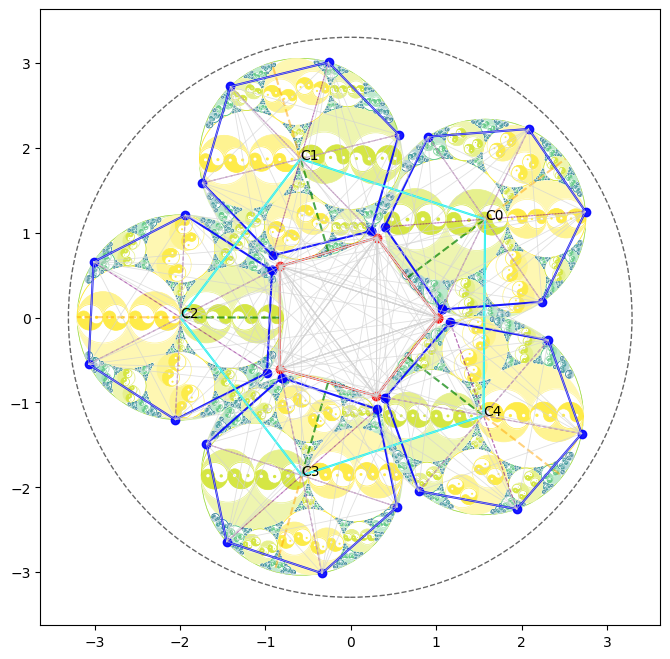

In [19]:
# appolonian_van_aubel.py
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib import scimath
import math
import os

# import Van_Aubel               # the file above

default_depth = 3
default_layers = 5
adj_angle = np.pi / 2

all_circles = []
queue = []


# ---------------------------------------------------
# Angular utilities
# ---------------------------------------------------

def _ang_norm(a):
    return a % (2*np.pi)


def _ang_sep(a, b):
    """Smallest angular distance between a and b (radians)."""
    d = (a - b + np.pi) % (2*np.pi) - np.pi
    return abs(d)


def _min_sep_to_set(angle, angles):
    if not angles:
        return np.pi  # no constraint
    return min(_ang_sep(angle, a) for a in angles)


# ---------------------------------------------------
# Box–Muller based random helpers
# ---------------------------------------------------

def _box_muller():
    u1, u2 = np.random.rand(), np.random.rand()
    # guard u1==0
    u1 = np.nextafter(0, 1) if u1 == 0.0 else u1
    z0 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2*np.pi*u2)
    z1 = np.sqrt(-2.0 * np.log(u1)) * np.sin(2*np.pi*u2)
    return z0, z1


def sample_gaussian_radius(low, high, mu=None, sigma=None):
    """
    Sample a radius using Box–Muller Gaussian, then clamp into [low, high].
    - low, high: bounds of the interval
    - mu: mean of Gaussian (defaults to midpoint)
    - sigma: stddev of Gaussian (defaults to (high-low)/6 so ~99% inside interval)
    """
    if mu is None:
        mu = 0.5 * (low + high)
    if sigma is None:
        sigma = (high - low) / 6.0

    u1, u2 = np.random.rand(), np.random.rand()
    z0 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2*np.pi*u2)

    r = mu + sigma * z0
    return min(max(r, low), high)


def sample_wrapped_normal(mu, sigma):
    """Sample from N(mu, sigma^2) on the circle (wrapped to [0, 2π))."""
    z0, _ = _box_muller()
    return _ang_norm(mu + sigma * z0)


def choose_best_separated_angle(prev_angles, *,
                                sigma=np.pi/8,
                                min_sep=0.0,
                                candidates_per_ref=64,
                                extra_candidates=128):
    """
    Propose many wrapped-Gaussian candidates (Box–Muller) around the *opposites*
    of the previous angles (a_i + π), plus some global extras.
    Return the one with the largest min-distance to prev_angles.
    """
    prev_angles = [_ang_norm(a) for a in (prev_angles or [])]
    cand = []

    if prev_angles:
        # bias proposals around angles opposite to prior ones (good separation)
        for a in prev_angles:
            mu = _ang_norm(a + np.pi)
            for _ in range(candidates_per_ref):
                cand.append(sample_wrapped_normal(mu, sigma))
    else:
        # no history: center at random mean
        mu = np.random.uniform(0, 2*np.pi)
        for _ in range(max(extra_candidates, 64)):
            cand.append(sample_wrapped_normal(mu, sigma))

    # add some global exploration candidates, centered at random means
    for _ in range(extra_candidates):
        mu = np.random.uniform(0, 2*np.pi)
        cand.append(sample_wrapped_normal(mu, sigma))

    # score by min separation to the set
    best_angle, best_score = None, -1.0
    for ang in cand:
        score = _min_sep_to_set(ang, prev_angles)
        if score >= min_sep and score > best_score:
            best_score, best_angle = score, ang

    # fallback: if none pass min_sep, pick the farthest anyway
    if best_angle is None:
        best_angle = max(cand, key=lambda x: _min_sep_to_set(x, prev_angles))

    return best_angle


# ---------------------------------------------------
# Color helpers
# ---------------------------------------------------

def _luma(rgba):
    # Perceived luminance (Rec.709)
    r, g, b = rgba[:3]
    return 0.2126*r + 0.7152*g + 0.0722*b


def _darkest_color(colormap, samples=256):
    """
    Return the darkest color in a Matplotlib cmap (by sampling) or in an RGBA list.
    """
    import matplotlib.pyplot as plt
    if isinstance(colormap, str):
        cmap = plt.get_cmap(colormap)
        t_vals = np.linspace(0.0, 1.0, max(2, int(samples)))
        colors = np.array([cmap(t) for t in t_vals])
        lum = np.array([_luma(c) for c in colors])
        return tuple(colors[int(np.argmin(lum))])
    else:
        # RGBA sequence
        if not colormap:
            return (0, 0, 0, 1)
        lum = np.array([_luma(c) for c in colormap])
        return tuple(colormap[int(np.argmin(lum))])


def _last_cmap_colors(colormap, n=3, span=0.15):
    """
    Return n 'dark' colors from a colormap.
    - If `colormap` is a string, sample the last `span` (default 15%) of the map.
    - If `colormap` is a list/tuple of RGBA, take the last n items (pad with last if needed).
    """
    import matplotlib.pyplot as plt
    if isinstance(colormap, str):
        cmap = plt.get_cmap(colormap)
        lo = max(0.0, 1.0 - float(span))
        ts = np.linspace(lo, 1.0, n)  # dark tail
        return [cmap(t) for t in ts]
    else:
        if not colormap:
            return [(0, 0, 0, 1)] * n
        N = len(colormap)
        idxs = [max(0, N - 1 - i) for i in range(n)]
        return [colormap[i] for i in idxs]


def _gaussian_cdf(x, mu=0.5, sigma=0.22):
    x = max(0.0, min(1.0, float(x)))
    z = (x - mu) / (sigma * math.sqrt(2.0))
    return 0.5 * (1.0 + math.erf(z))


def _lerp_color(c1, c2, t):
    return tuple((1 - t) * np.array(c1) + t * np.array(c2))


def _make_gradient(start_color, end_color, n):
    return [_lerp_color(start_color, end_color, i / max(1, n - 1)) for i in range(n)]


def _get_layer_color(colormap, i, layers, *, sigma=0.22, start_index=2,
                     reverse=True, flipped=False):
    import matplotlib.pyplot as plt
    L = max(1, int(layers))
    s = i / max(1, L - 1)
    m = _gaussian_cdf(s, sigma=sigma)
    if flipped:
        m = 1.0 - m
    t = 1.0 - m if reverse else m

    if isinstance(colormap, (list, tuple)):  # RGBA list
        N = len(colormap)
        if N == 0:
            return (0, 0, 0, 1)
        start = min(start_index, max(0, N - 1))
        idx_float = start + t * (N - 1 - start)
        idx = int(round(max(start, min(N - 1, idx_float))))
        return colormap[idx]
    else:                                     # cmap name
        cmap = plt.get_cmap(colormap)
        t_shift = (start_index / L) + (1.0 - start_index / L) * t
        return cmap(t_shift)


# ---------------------------------------------------
# Global state reset
# ---------------------------------------------------

def reset_gasket_state():
    global all_circles, queue
    all_circles = []
    queue = []


# ---------------------------------------------------
# Base triple and Descartes geometry
# ---------------------------------------------------

def generate_base_circles(ax, radius, depth=default_depth,
                          colormap="viridis", sigma=0.22,
                          flipped=False, start_index=2,
                          center=(0.0, 0.0)):
    """
    Build the base triple and seed the recursion queue.
    Supports arbitrary 'center' for the enclosing parent circle.
    """
    global all_circles, queue

    r0 = sample_gaussian_radius(radius/4.0, 3.0*radius/4.0)

    # Color scheme for parent & two children
    if not flipped:
        # select three dark-ish colors from the colormap
        base_cols = _last_cmap_colors(colormap, n=3, span=0.15)
        while len(base_cols) < 3:
            base_cols.append(base_cols[-1])
        col_parent, col_child1, col_child2 = base_cols[0], base_cols[1], base_cols[2]
    else:
        # Flipped branch: use your Gaussian schedule starting from index 2
        col_parent = _get_layer_color(colormap, 0, depth,
                                      sigma=sigma, start_index=start_index,
                                      reverse=True, flipped=True)
        col_child1 = _get_layer_color(colormap, 1, depth,
                                      sigma=sigma, start_index=start_index,
                                      reverse=True, flipped=True)
        idx2 = 2 if depth > 2 else 1
        col_child2 = _get_layer_color(colormap, idx2, depth,
                                      sigma=sigma, start_index=start_index,
                                      reverse=True, flipped=True)

    def _to_rgba_tuple(c):
        if len(c) == 3:
            return (c[0], c[1], c[2], 1.0)
        return tuple(c)

    bp = _to_rgba_tuple(col_parent)
    bc1 = _to_rgba_tuple(col_child1)
    bc2 = _to_rgba_tuple(col_child2)

    print(f"[BASE] parent RGB=({int(bp[0]*255)},{int(bp[1]*255)},{int(bp[2]*255)}), a={bp[3]:.2f}", flush=True)
    print(f"[BASE] child1 RGB=({int(bc1[0]*255)},{int(bc1[1]*255)},{int(bc1[2]*255)}), a={bc1[3]:.2f}", flush=True)
    print(f"[BASE] child2 RGB=({int(bc2[0]*255)},{int(bc2[1]*255)},{int(bc2[2]*255)}), a={bc2[3]:.2f}", flush=True)

    cx, cy = center

    # enclosing parent: NEGATIVE bend
    c1 = Circle_Yinyang((cx, cy), bend=-(1.0 / radius), edgecolor="none")
    c1.draw_yinyang_graph(ax, depth=default_depth, rev=True, color=col_parent)
    alpha = c1.get_angle()

    prev = [alpha,
            _ang_norm(alpha + np.pi/2),
            _ang_norm(-alpha - np.pi/2),
            _ang_norm(-alpha)]
    angle = choose_best_separated_angle(prev, sigma=np.pi/10, min_sep=np.pi/12)

    centers = [
        (cx + r0 * np.cos(angle),            cy + r0 * np.sin(angle)),
        (cx - (radius - r0) * np.cos(angle), cy - (radius - r0) * np.sin(angle)),
    ]
    r1, r2 = radius - r0, r0

    # child 1
    c2 = Circle_Yinyang(centers[0], radius=r1, edgecolor="none")
    c2.set_angle(-angle + adj_angle)
    c2.draw_yinyang_graph(ax, depth=default_depth, rev=False, color=col_child1)

    # child 2
    c3 = Circle_Yinyang(centers[1], radius=r2, edgecolor="none")
    c3.set_angle(angle - adj_angle)
    c3.draw_yinyang_graph(ax, depth=default_depth, rev=False, color=col_child2)

    all_circles = [c1, c2, c3]
    queue = [(c1, c2, c3)]
    return c1, c2, c3


def _circle_key(center, radius, decimals=9):
    x, y = center
    return (round(x, decimals), round(y, decimals), round(radius, decimals))


def descartes(c1, c2, c3):
    k1, k2, k3 = c1.get_bend(), c2.get_bend(), c3.get_bend()
    s  = k1 + k2 + k3
    disc = k1*k2 + k2*k3 + k3*k1
    disc = max(disc, 0.0)
    rt = 2.0 * np.sqrt(disc)
    return [s + rt, s - rt]  # two k4 values (one >0 inner, one <0 outer)


def complex_descartes(c1, c2, c3, k4_list):
    k1, k2, k3 = c1.get_bend(), c2.get_bend(), c3.get_bend()
    print(f"r1={c1.get_radius()}, r2={c2.get_radius()}, r3={c3.get_radius()}")
    z1 = complex(*c1.get_center())
    z2 = complex(*c2.get_center())
    z3 = complex(*c3.get_center())
    print(f"c1={(z1.real, z1.imag)}, c2={(z2.real, z2.imag)}, c3={(z3.real, z3.imag)}")

    zk1, zk2, zk3 = z1*k1, z2*k2, z3*k3
    s  = zk1 + zk2 + zk3
    zrt = 2.0 * scimath.sqrt(zk1*zk2 + zk2*zk3 + zk1*zk3)

    k4a, k4b = k4_list
    centers = [
        (k4a, (s + zrt) / k4a), (k4a, (s - zrt) / k4a),
        (k4b, (s + zrt) / k4b), (k4b, (s - zrt) / k4b),
    ]
    return [(float(k), (float(z.real), float(z.imag))) for (k, z) in centers]


def _r_from_k(k):
    return 1.0/abs(k)


def tangent_err(ca, cb):
    xa, ya = ca.get_center()
    xb, yb = cb.get_center()
    ra, rb = _r_from_k(ca.get_bend()), _r_from_k(cb.get_bend())
    d = np.hypot(xa - xb, ya - yb)
    if ca.get_bend()*cb.get_bend() > 0:   # same sign → external
        target = ra + rb
    else:                                  # opposite sign → internal
        target = abs(ra - rb)
    return abs(d - target)


def is_tangent(c4, c1, c2, c3, error=1e-6):
    return all(tangent_err(c4, c) < error for c in (c1, c2, c3))


def next_layer(ax, depth=0, color="red"):
    global queue, all_circles
    next_q = []
    seen = set(_circle_key(c.get_center(), 1.0/abs(c.get_bend())) for c in all_circles)

    for _ in range(len(queue)):
        c1, c2, c3 = queue.pop(0)
        k4s = descartes(c1, c2, c3)
        sols = complex_descartes(c1, c2, c3, k4s)

        for (k, (x, y)) in sols:
            if k <= 0:  # skip enclosing
                continue
            r = 1.0 / k
            key = _circle_key((x, y), r)
            if key in seen:
                continue
            seen.add(key)

            c = Circle_Yinyang((x, y), radius=r, edgecolor="none")
            if is_tangent(c, c1, c2, c3):
                c.draw_yinyang_graph(ax, depth=default_depth, rev=False, color=color)
                c.set_angle(_ang_norm(-c.get_angle()) * depth)
                all_circles.append(c)

                next_q.append((c,  c2, c3))
                next_q.append((c1, c,  c3))
                next_q.append((c1, c2, c))
    queue = next_q


# ---------------------------------------------------
# Unified plotter
# ---------------------------------------------------

def plot_taiji(ax, radius=50, layers=default_depth, colormap="viridis",
               sigma=0.22, flipped=False, start_index=2, center=(0.0, 0.0)):
    """
    Draw the base triple, then `layers` rounds of new tangent circles.
    Color schedule is Gaussian-smoothed, optionally flipped, and starts from
    the `start_index`-th color (0-based).
    """
    print("[plot_taiji] entering", flush=True)

    # Build base triple (sets globals `all_circles` and `queue`)
    generate_base_circles(ax, radius,
                          colormap=colormap,
                          flipped=flipped,
                          center=center)

    # Resolve cmap
    cmap = None
    cmap_list = None
    if isinstance(colormap, str):
        cmap = plt.get_cmap(colormap)
    else:
        cmap_list = list(colormap)

    L = max(1, int(layers))
    for i in range(L):
        s = i / max(1, L - 1)
        m = _gaussian_cdf(s, mu=0.5, sigma=sigma)
        if flipped:
            m = 1.0 - m
        t_raw = 1.0 - m

        # shift to start from index `start_index` relative to total `layers`
        t = (start_index / L) + (1.0 - start_index / L) * t_raw
        t = max(0.0, min(1.0, t))

        # pick color from either a named cmap or an RGBA list
        if cmap is not None:
            color = cmap(t)
            r, g, b, a = color
        else:
            if not cmap_list:
                color = (0, 0, 0, 1)
                r, g, b, a = color
            else:
                idx = int(round(t * (len(cmap_list) - 1)))
                idx = min(len(cmap_list) - 1, max(0, idx))
                c = cmap_list[idx]
                if len(c) == 3:
                    r, g, b = c
                    a = 1.0
                else:
                    r, g, b, a = c
                color = (r, g, b, a)

        print(f"[plot_taiji] layer {i}: RGB=({int(r*255)}, {int(g*255)}, {int(b*255)}), "
              f"a={a:.2f}, t={t:.3f}", flush=True)

        next_layer(ax, i, color=color)


# ---------------------------------------------------
# Van Aubel–seeded Apollonian gasket
# ---------------------------------------------------

def van_aubel_seeded_gasket(
    n_base=5,
    padding=0.12,
    layers=default_layers,
    colormap="viridis",
    outer_circle_margin=0.06,
    seed=42
):
    """
    1) Build a perturbed n-gon and its Van Aubel external polygons.
    2) For each external polygon, take its circumcircle and use it as the
       'parent' circle of an Apollonian yin–yang gasket via plot_taiji().
    """
    # 1) Build base polygon (Van Aubel generator)
    A = perturbed_polygon(
        n=n_base,
        radius=1.0,
        noise_level=0.02,
        lambd=0.01,
        seed=seed
    )

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.sca(ax)  # make sure Van_Aubel uses this axes

    # 2) Draw Van Aubel picture and get geometry
    geom = plot_polygon_with_external(
        A,
        n=len(A) + 1,
        padding=padding,
        show_outer_circle=True,
        outer_circle_margin=outer_circle_margin,
        return_geometry=True
    )

    centers = geom["external_centers"]
    radii   = geom["external_circumradii"]

    # 3) For each external polygon's circumcircle, drop a gasket
    for C, R in zip(centers, radii):
        reset_gasket_state()
        plot_taiji(
            ax,
            radius=R,
            layers=layers,
            colormap=colormap,
            sigma=0.22,
            flipped=False,
            start_index=2,
            center=C
        )

    ax.set_aspect("equal")
    ax.set_title("Van Aubel polygons seeded with Apollonian yin–yang gaskets")
    plt.show()


# ---------------------------------------------------
# Main
# ---------------------------------------------------

if __name__ == '__main__':
    # Example run to reproduce the combined figure
    van_aubel_seeded_gasket(
        n_base=5,
        padding=0.12,
        layers=default_layers,
        colormap="viridis",
        outer_circle_margin=0.06,
        seed=42
    )